In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.set_cmap("magma")
%load_ext autoreload
%autoreload 2

from kexp import atomdata, load_atomdata


<Figure size 640x480 with 0 Axes>

In [2]:
ad = atomdata(0,39343)
print(ad.run_info.run_id)
plt.set_cmap("viridis")
from waxa.plotting import *

No ROI saved in run 48372.
ROI specified by Run ID. Attempting to load ROI...
ROI loaded from run 39343.
Using ROI loaded from run 39343.
48372


<Figure size 640x480 with 0 Axes>

In [3]:
# ad.transpose_data()
# print(ad.experiment_code.experiment)

In [4]:
# ad.save_roi_h5()

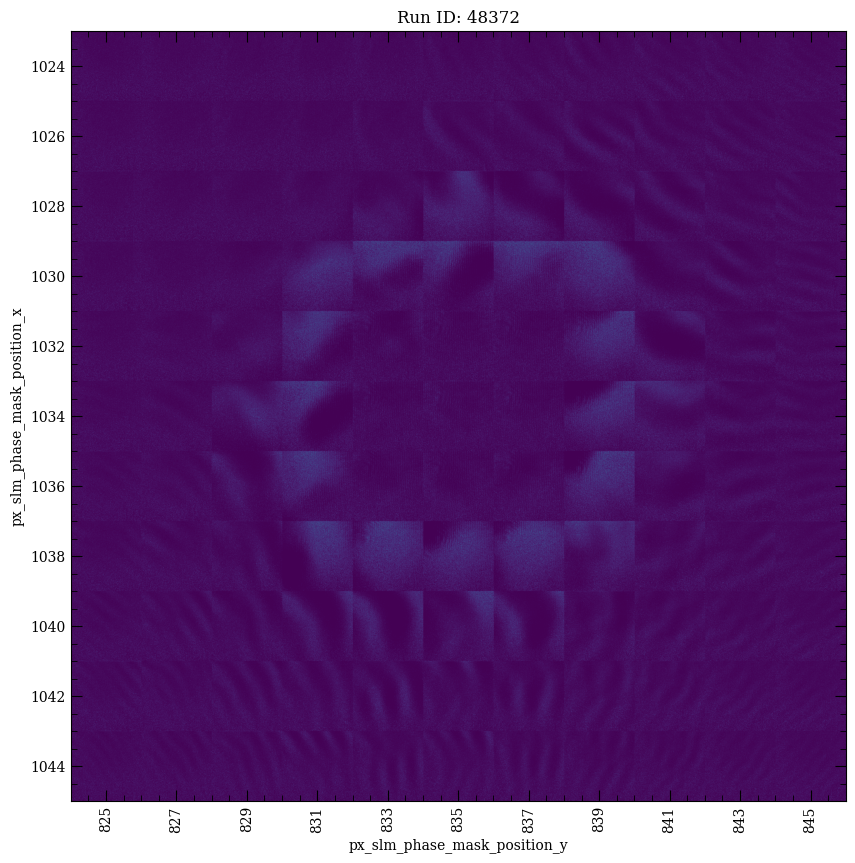

In [5]:
# od grid
from waxa.plotting import *
mixOD_grid(ad,
           xvar0format='1.0f',xvar0mult=1., xvar0unit='',
            xvar1format='1.0f',xvar1mult=1., xvar1unit='',
            max_od=0.,
            figsize=(10,10),
            aspect='auto')

99850.48103877717


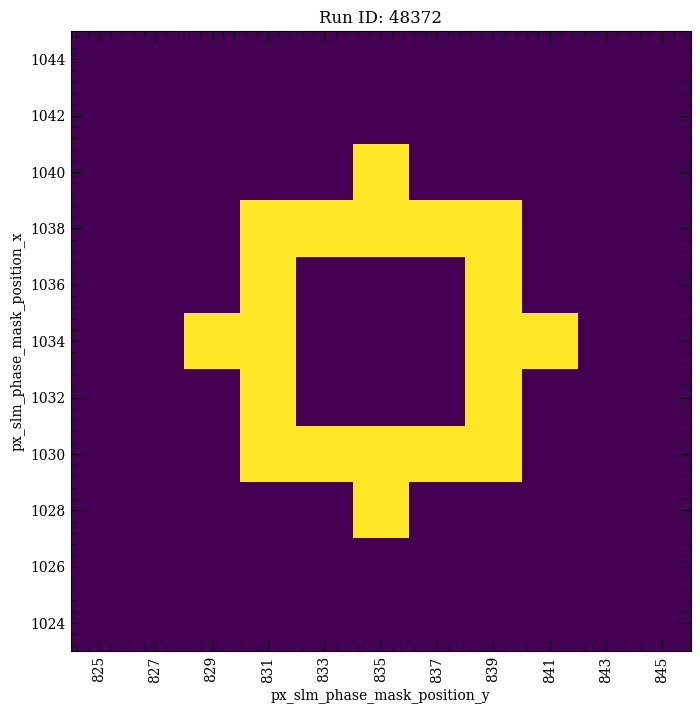

In [6]:
# atom number

vmin=None
vmax=None

# vmin = 0.
# vmax = 2.e6

from copy import deepcopy
atom_number = deepcopy(ad.atom_number)
print(np.mean(atom_number))
atom_number = (atom_number > 1.1*np.mean(atom_number)).astype(int)
vmax = np.max(atom_number)
# atom_number[atom_number>vmax] = np.NaN

from matplotlib import ticker
plt.figure(figsize=(8,15))
ax = plt.gca()
image = plt.imshow(atom_number,vmin=vmin,vmax=vmax,origin='lower')
plt.ylabel(f"{ad.xvarnames[0]}")
plt.xlabel(f"{ad.xvarnames[1]}")
# ax.invert_yaxis()
ytick = [f"{v:1.0f}" for v in ad.xvars[0]]
xtick = [f"{v:1.0f}" for v in ad.xvars[1]]
plt.yticks(range(ad.xvardims[0]),ytick)
plt.xticks(range(ad.xvardims[1]),xtick,rotation=90)
plt.title(f"Run ID: {ad.run_info.run_id}")
plt.show()

In [7]:
import numpy as np

def center_of_mass(A):
    A = np.array(A, dtype=float)
    total = A.sum()
    if total == 0:
        return (None, None) 
    rows, cols = A.shape
    y_indices, x_indices = np.indices((rows, cols))
    x_center = (x_indices * A).sum() / total
    y_center = (y_indices * A).sum() / total
    return (x_center, y_center)

# Example
yc, xc = (center_of_mass(atom_number))
print("The position of the spot should be at:")
print(ad.xvars[0][round(xc)], ad.xvars[1][round(yc)])
print("\n")
print(fr"self.px_slm_phase_mask_position_x = {ad.xvars[0][round(xc)]}")   
print(fr"self.px_slm_phase_mask_position_y = {ad.xvars[1][round(yc)]}")

The position of the spot should be at:
1034 835


self.px_slm_phase_mask_position_x = 1034
self.px_slm_phase_mask_position_y = 835
